# Italic Bibles

In [2]:
pip install simplemma

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
import simplemma
import pandas as pd
import ast
import inspect
import numpy as np
import json
import _pickle as pickle
import matplotlib.pyplot as plt

In [9]:
def tokenize_corpus(text):
    sentences = sent_tokenize(text.replace("\n", " ").lower())
    tokenized_sentences = [
        RegexpTokenizer(r"\w+").tokenize(sentence)
        for sentence in sentences
    ]
    tokenized_corpus = [
        [word for word in sentence]
        for sentence in tokenized_sentences
    ]
    return tokenized_corpus

In [10]:
shared_vecs = np.array([4,6,8,13,14,15,18,22,27,28,38,40,49,54,55,57,60,65,67,69,71,72,74,75,79,81,82,83,89,90,91,93,94,97,102,104,105,110,112,114,118,119,122,129])

In [11]:
def contains_explicit_return(f):
    return any(isinstance(node, ast.Return) for node in ast.walk(ast.parse(inspect.getsource(f))))

In [12]:
df = pd.read_csv('data/bibles/cognates.csv', names=['latin', 'spanish', 'french', 'italian'], header=None)
df = df.loc[[4,6,8,13,14,15,18,22,27,28,38,40,49,54,55,57,60,65,67,69,71,72,74,75,79,81,82,83,89,90,91,93,94,97,102,104,105,110,112,114,118,119,122,129]]
df

,latin,spanish,french,italian
4,aqua,agua,eau,acqua
6,alter,otro,autre,altro
8,ante,antes,avant,davanti
13,arca,arca,arche,arca
14,arcus,arco,arc,arco
15,ardor,ardor,ardeur,ardore
18,aurum,oro,or,oro
22,barba,barba,barbe,barba
27,folium,hoja,feuille,foglia
28,flamma,llama,flamme,fiamma


## French

In [13]:
with open('data/bibles/french/french_bible_processed.txt', 'w', encoding = 'utf-8') as f:
    with open("texts/italic_bibles/french_bible.txt", 'r') as g:
        text = g.read()
        tokens = word_tokenize(text)
        stop = set(stopwords.words('french'))
        for i in tokens:
            f.write(simplemma.lemmatize(i, lang = 'fr') + ' ')

In [14]:
with open('data/bibles/french/french_bible_processed.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    fr_corpus = tokenize_corpus(text)
    fr_model = Word2Vec(sentences = fr_corpus, 
                 vector_size = 100, 
                 window = 20,
                 epochs = 100)

In [15]:
fr_words = df['french']
fr_index = list(fr_words)
fr_vectors = {}
for word in fr_words:
    if word in fr_model.wv.index_to_key:
        fr_vectors[fr_index.index(word)] = fr_model.wv.get_vector(word)
    else:
        pass

In [91]:
fr_cosines = {}
fr_cosines_list = []
fr_wordbox = []
for word1 in fr_words:
    for word2 in fr_words:
        if word2 not in fr_wordbox:
            if word1 != word2:
                similarity = fr_model.wv.similarity(word1, word2)
                fr_cosines[(word1, word2)] = similarity
                fr_cosines_list.append(similarity)
                fr_wordbox.append(word1)

### Spanish

In [17]:
with open('data/bibles/spanish/spanish_bible_processed.txt', 'w', encoding = 'utf-8') as f:
    with open("texts/italic_bibles/spanish_bible.txt", 'r') as g:
        text = g.read()
        tokens = word_tokenize(text)
        stop = set(stopwords.words('spanish'))
        for i in tokens:
            f.write(simplemma.lemmatize(i, lang = 'es') + ' ')

In [18]:
with open('data/bibles/spanish/spanish_bible_processed.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    es_corpus = tokenize_corpus(text)
    es_model = Word2Vec(sentences = es_corpus, 
                 vector_size = 100, 
                 window = 20,
                 epochs = 100)

In [19]:
es_words = df['spanish']
es_index = list(es_words)
es_vectors = {}
for word in es_words:
    if word in es_model.wv.index_to_key:
        es_vectors[es_index.index(word)] = es_model.wv.get_vector(word)
    else:
        pass

In [90]:
es_cosines = {}
es_cosines_list = []
es_wordbox = []
for word1 in es_words:
    for word2 in es_words:
        if word2 not in es_wordbox:
            if word1 != word2:
                similarity = es_model.wv.similarity(word1, word2)
                es_cosines[(word1, word2)] = similarity
                es_cosines_list.append(similarity)
                es_wordbox.append(word1)

### Italian

In [21]:
with open('data/bibles/italian/italian_bible_processed.txt', 'w', encoding = 'utf-8') as f:
    with open("texts/italic_bibles/italian_bible.txt", 'r') as g:
        text = g.read()
        tokens = word_tokenize(text)
        stop = set(stopwords.words('italian'))
        for i in tokens:
            f.write(simplemma.lemmatize(i, lang = 'it') + ' ')

In [22]:
with open('data/bibles/italian/italian_bible_processed.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    it_corpus = tokenize_corpus(text)
    it_model = Word2Vec(sentences = it_corpus, 
                 vector_size = 100, 
                 window = 20,
                 epochs = 100)

In [23]:
it_words = df['italian']
it_index = list(it_words)
it_vectors = {}
for word in it_words:
    if word in it_model.wv.index_to_key:
        it_vectors[it_index.index(word)] = it_model.wv.get_vector(word)
    else:
        pass

In [88]:
it_cosines = {}
it_cosines_list = []
it_wordbox = []
for word1 in it_words:
    for word2 in it_words:
        if word2 not in it_wordbox:
            if word1 != word2:
                similarity = it_model.wv.similarity(word1, word2)
                it_cosines_list.append(similarity)
                it_cosines[(word1, word2)] = similarity
                it_wordbox.append(word1)

In [89]:
len(it_cosines_list)

946

### Latin

In [25]:
with open('data/bibles/latin/latin_bible_processed.txt', 'w', encoding = 'utf-8') as f:
    with open("texts/italic_bibles/latin_bible.txt", 'r') as g:
        text = g.read()
        tokens = word_tokenize(text)
        for i in tokens:
            f.write(simplemma.lemmatize(i, lang = 'la') + ' ')

In [26]:
with open('data/bibles/latin/latin_bible_processed.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    la_corpus = tokenize_corpus(text)
    la_model = Word2Vec(sentences = la_corpus, 
                 vector_size = 100, 
                 window = 20,
                 epochs = 100)

In [27]:
la_words = df['latin']
la_index = list(la_words)
la_vectors = {}
for word in la_words:
    if word in la_model.wv.index_to_key:
        la_vectors[la_index.index(word)] = la_model.wv.get_vector(word)
    else:
        pass

In [86]:
la_cosines = {}
la_cosines_list = []
la_wordbox = []
for word1 in la_words:
    for word2 in la_words:
        if word2 not in la_wordbox:
            if word1 != word2:
                similarity = la_model.wv.similarity(word1, word2)
                la_cosines_list.append(similarity)
                la_cosines[(word1, word2)] = similarity
                la_wordbox.append(word1)

In [87]:
len(la_cosines_list)

946

In [29]:
la_dict = {'la_dict': la_cosines}
fr_dict = {'fr_dict': fr_cosines}
es_dict = {'es_dict': es_cosines}
it_dict = {'it_dict': it_cosines}
with open("data/bibles/vectors/cosines.csv", "w", encoding="utf-8") as f:
    f.write(str(f"Latin:\n{la_dict}\n\nFrench:\n{fr_dict}\n\nSpanish:\n{es_dict}\n\nItalian:\n{it_dict}"))

### Comparing Vectors

In [30]:
values = list(range(141))

In [31]:
for word in fr_index:
    fr_dict = { k:v for (k,v) in zip(values, fr_index)}
for word in es_index:
    es_dict = { k:v for (k,v) in zip(values, es_index)}
for word in it_index:
    it_dict = { k:v for (k,v) in zip(values, it_index)}
for word in la_index:
    la_dict = { k:v for (k,v) in zip(values, la_index)}

In [32]:
fr_dict_true = {}
for k, v in fr_dict.items():
    if v in fr_model.wv.index_to_key:
        fr_dict_true[k] = 'T'

In [33]:
es_dict_true = {}
for k, v in es_dict.items():
    if v in es_model.wv.index_to_key:
        es_dict_true[k] = 'T'

In [34]:
it_dict_true = {}
for k, v in it_dict.items():
    if v in it_model.wv.index_to_key:
        it_dict_true[k] = 'T'

In [35]:
la_dict_true = {}
for k, v in la_dict.items():
    if v in la_model.wv.index_to_key:
        la_dict_true[k] = 'T'

In [36]:
fr_key = frozenset(fr_dict_true.items())
es_key = frozenset(es_dict_true.items())
it_key = frozenset(it_dict_true.items())
la_key = frozenset(la_dict_true.items())
t_f_cognates = {la_key, es_key, fr_key, it_key}
t_f_cognates

{frozenset({(0, 'T'),
            (1, 'T'),
            (2, 'T'),
            (3, 'T'),
            (4, 'T'),
            (5, 'T'),
            (6, 'T'),
            (7, 'T'),
            (8, 'T'),
            (9, 'T'),
            (10, 'T'),
            (11, 'T'),
            (12, 'T'),
            (13, 'T'),
            (14, 'T'),
            (15, 'T'),
            (16, 'T'),
            (17, 'T'),
            (18, 'T'),
            (19, 'T'),
            (20, 'T'),
            (21, 'T'),
            (22, 'T'),
            (23, 'T'),
            (24, 'T'),
            (25, 'T'),
            (26, 'T'),
            (27, 'T'),
            (28, 'T'),
            (29, 'T'),
            (30, 'T'),
            (31, 'T'),
            (32, 'T'),
            (33, 'T'),
            (34, 'T'),
            (35, 'T'),
            (36, 'T'),
            (37, 'T'),
            (38, 'T'),
            (39, 'T'),
            (40, 'T'),
            (41, 'T'),
            (42, 'T'),
            (43, 'T')

In [37]:
vector_dicts = [la_vectors, es_vectors, fr_vectors, it_vectors]

organized_vectors = {k: [d[k] for d in vector_dicts if k in d.keys()] for k in vector_dicts[0]}

In [38]:
with open('data/bibles/vectors/vectors.txt', 'w', encoding = 'utf-8') as f:
    f.write(str(organized_vectors))

### Visualization

In [93]:
cosines_df = pd.DataFrame({'latin_cosines':la_cosines_list, 'french_cosines':fr_cosines_list,'spanish_cosines':es_cosines_list,'italian_cosines':it_cosines_list})

In [94]:
cosines_df

,latin_cosines,french_cosines,spanish_cosines,italian_cosines
0,-0.108862,0.302483,-0.041669,0.209669
1,-0.041434,-0.019440,0.003804,-0.069737
2,0.097795,0.324291,0.137259,0.369440
3,-0.006352,0.229356,0.136376,0.251478
4,0.104060,0.074336,0.097942,0.254948
...,...,...,...,...
941,-0.027608,-0.057529,-0.174549,-0.138148
942,0.048166,0.048067,0.062413,-0.029745
943,0.007220,0.045094,0.241053,-0.078323
944,0.072947,-0.141578,0.198000,0.066444


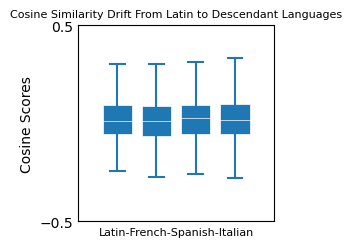

In [141]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots()
VP = ax.boxplot(cosines_df, positions=[2,4,6,8], widths=1.5, patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={'color':'white','linewidth':0.5},
                boxprops={'facecolor':'C0','edgecolor':'white','linewidth':0.5},
                whiskerprops={'color':'C0','linewidth':1.5},
                capprops={'color':'C0','linewidth':1.5})

ax.set(xlim=(0,10), xticks=np.arange(0),
       ylim=(-0.5,0.5), yticks=np.arange(-0.5,1))

plt.ylabel('Cosine Scores', fontsize=10)
plt.xlabel("Latin-French-Spanish-Italian", fontsize=8)

plt.title("Cosine Similarity Drift From Latin to Descendant Languages", fontsize=8)
plt.savefig('data/bibles/italic_cosines.pdf',dpi=300, bbox_inches = "tight")

plt.show()